## Machine Learning Pipeline - Model Training
In the following notebooks, we will go through the implementation of each steps in the Machine Learning Pipeline: 

1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. **Model Training**
5. Obtaining Predictions/Scoring

### Rossman Store Sales Prediction
The aim of the project is to build an end-to-end machine learning model to predict the sales of a given store and a set of inputs, including the promotions, competition, school and state holidays, seasonality, and locality.

In [1]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt

# to save the model
import joblib

# to build the model
from sklearn.linear_model import Lasso

# to evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
# load the train and test set with the engineered variables
X_train = pd.read_csv('xtrain.csv')
X_test = pd.read_csv('xtest.csv')

X_train.head()

,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceYear,PromoInterval,CompetitionDistance_na,CompetitionOpenSinceMonth_na,CompetitionOpenSinceYear_na,Promo2SinceYear_na
0,0.833333,0.587547,0.0,0.0,0.5,0.0,0.333333,0.0,0.354962,0.727273,0.000000,1.0,0.333333,0.333333,0.0,1.0,1.0,0.0
1,0.500000,0.599320,0.0,0.0,0.5,0.0,0.333333,1.0,0.245362,0.727273,0.000000,1.0,0.333333,0.666667,0.0,1.0,1.0,0.0
2,0.500000,0.653409,0.0,1.0,0.5,0.0,0.333333,0.0,0.386900,0.363636,0.052174,1.0,0.000000,0.666667,0.0,0.0,0.0,0.0
3,0.000000,0.777498,0.0,1.0,0.5,0.0,0.000000,1.0,0.782834,0.727273,0.000000,1.0,0.666667,0.666667,0.0,1.0,1.0,0.0
4,0.833333,0.586215,0.0,0.0,0.5,0.0,0.333333,0.0,0.474427,0.727273,0.000000,0.0,0.333333,1.000000,0.0,1.0,1.0,1.0


In [3]:
# load the target (remember that the target is log transformed)
y_train = pd.read_csv('ytrain.csv')
y_test = pd.read_csv('ytest.csv')

y_train.head()

,Sales
0,8.375630
1,8.268732
2,8.692490
3,10.093364
4,8.385032


In [4]:
# load the pre-selected features
features = pd.read_csv('selected_features.csv')
features = features['0'].to_list() 

# display final feature set
features

['DayOfWeek',
 'Customers',
 'Promo',
 'SchoolHoliday',
 'Assortment',
 'CompetitionDistance',
 'Promo2',
 'Promo2SinceYear',
 'PromoInterval',
 'CompetitionOpenSinceMonth_na',
 'Promo2SinceYear_na']

In [5]:
# reduce the train and test set to the selected features

X_train = X_train[features]
X_test = X_test[features]

### Regularized linear regression: Lasso
Remember to set the seed

In [6]:
lin_model = Lasso(alpha=0.001, random_state=0)

# train the model
lin_model.fit(X_train, y_train)

Lasso(alpha=0.001, random_state=0)

In [7]:
# evaluate the model:
# ====================

# remember that we log transformed the output (Sales)

# In order to get the true performance of the Lasso
# we need to transform both the target and the predictions
# back to the original store sales values.

# Evaluate performance using the mean squared error and
# the root of the mean squared error and r2

# make predictions for train set
pred = lin_model.predict(X_train)

# determine mse, rmse and r2
print('train mse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('train rmse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred), squared=False))))
print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(pred))))
print()

# make predictions for test set
pred = lin_model.predict(X_test)

# determine mse, rmse and r2
print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred), squared=False))))
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(pred))))
print()

print('Average store sales: ', int(np.exp(y_train).median()))

train mse: 2083836
train rmse: 1443
train r2: 0.783741073142338

test mse: 2068080
test rmse: 1438
test r2: 0.7868361853036607

Average store sales:  6341


Text(0.5, 1.0, 'Evaluation of Lasso Predictions')

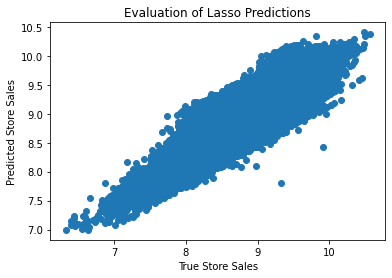

In [8]:
# let's evaluate our predictions respect to the real sale price
plt.scatter(y_test, lin_model.predict(X_test))
plt.xlabel('True Store Sales')
plt.ylabel('Predicted Store Sales')
plt.title('Evaluation of Lasso Predictions')

We can see that the model is doing a pretty good job at estimating store sales

In [9]:
y_test.reset_index(drop=True)

,Sales
0,8.337588
1,9.144521
2,9.294222
3,8.693161
4,8.240385
...,...
151965,8.789051
151966,9.090430
151967,8.965207
151968,7.771067


In [10]:
# Evaluate the distribution of the errors: 
# they should be fairly normally distributed
y_test.reset_index(drop=True, inplace=True)

preds = pd.Series(lin_model.predict(X_test))

preds

0         8.251111
1         9.208582
2         9.162485
3         8.730685
4         8.320092
            ...   
151965    8.900403
151966    8.907615
151967    9.038910
151968    8.057737
151969    8.843767
Length: 151970, dtype: float64

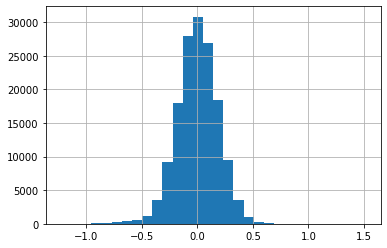

In [11]:
errors = y_test['Sales'] - preds
errors.hist(bins=30)
plt.show()

The distribution of the errors follows quite a gaussian distribution. That suggests that the  model is doing a good job as well.

### Feature Importance

Text(0.5, 1.0, 'Feature Importance')

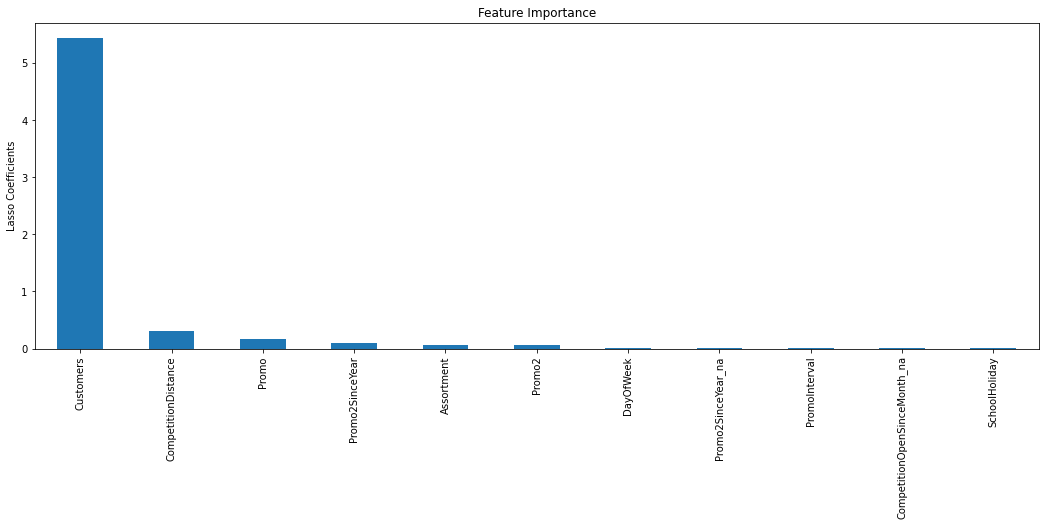

In [12]:
importance = pd.Series(np.abs(lin_model.coef_.ravel()))
importance.index = features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance')

### Save the model

In [13]:
joblib.dump(lin_model, 'linear_regression.joblib') 

['linear_regression.joblib']